In [0]:
!echo '{"username":"ronniesong0809","key":"269788090750b1eb7d55a04d86886708"}' > kaggle.json

In [0]:
!cp /content/kaggle.json /root/.kaggle/kaggle.json

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle config set -n path -v/content

- path is now set to: /content


In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!kaggle datasets download -d keras/vgg19

In [0]:
!unzip datasets/paultimothymooney/chest-xray-pneumonia/chest-xray-pneumonia.zip
!unzip datasets/keras/vgg19/vgg19.zip

In [0]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
# resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg_weights_path = 'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
model_VGG19 = VGG19(include_top=False, pooling='avg', weights=vgg_weights_path)
my_new_model.add(model_VGG19)
my_new_model.add(Dense(num_classes, activation='softmax'))

# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False

In [60]:
model_VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [61]:
my_new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 20,025,410
Trainable params: 1,026
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD

In [0]:
# my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
my_new_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function = preprocess_input, featurewise_center = True)

train_generator = data_generator.flow_from_directory(
                                        directory="chest_xray/chest_xray/train",
                                        target_size=(image_size, image_size),
                                        batch_size=16,
                                        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
                                        directory="chest_xray/chest_xray/val",
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

test_generator = data_generator.flow_from_directory(
                                        directory="chest_xray/chest_xray/test",
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [65]:
# fit_stats below saves some statistics describing how model fitting went
# the key role of the following line is how it changes my_new_model by fitting to data
fit_stats = my_new_model.fit_generator(train_generator, epochs=5, validation_data=validation_generator, validation_steps=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
326/326 [==============================] - 63s 192ms/step - loss: 0.8474 - accuracy: 0.7289 - val_loss: 1.0719 - val_accuracy: 0.5625
Epoch 2/5
326/326 [==============================] - 62s 192ms/step - loss: 0.2792 - accuracy: 0.8997 - val_loss: 0.6226 - val_accuracy: 0.7500
Epoch 3/5
326/326 [==============================] - 63s 193ms/step - loss: 0.1902 - accuracy: 0.9293 - val_loss: 0.4695 - val_accuracy: 0.7500
Epoch 4/5
326/326 [==============================] - 63s 193ms/step - loss: 0.1568 - accuracy: 0.9425 - val_loss: 0.3355 - val_accuracy: 0.7500
Epoch 5/5
326/326 [==============================] - 63s 195ms/step - loss: 0.1376 - accuracy: 0.9486 - val_loss: 0.2938 - val_accuracy: 0.8125


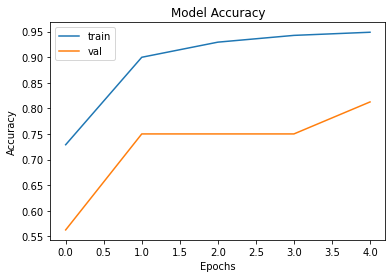

In [66]:
import matplotlib.pyplot as plt

plt.plot(fit_stats.history['accuracy'])
plt.plot(fit_stats.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

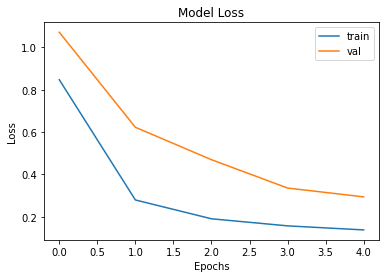

In [67]:
plt.plot(fit_stats.history['loss'])
plt.plot(fit_stats.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()